In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


In [22]:
# Load California Housing dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 16512
Test samples: 4128


In [23]:
# Create and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
print("Coefficients:", lr.coef_)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Training MSE: 0.5179331255246699
Test MSE: 0.5558915986952422


In [24]:
# Define alpha values for Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_cv.best_params_)

# Evaluate on test set
y_test_ridge = ridge_cv.predict(X_test)
mse_test_ridge = mean_squared_error(y_test, y_test_ridge)
print("Ridge Test MSE:", mse_test_ridge)

Best alpha for Ridge: {'alpha': 10}
Ridge Test MSE: 0.5550405537342994


In [25]:
# Define alpha values for Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# GridSearchCV
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

print("Best alpha for Lasso:", lasso_cv.best_params_)

# Evaluate on test set
y_test_lasso = lasso_cv.predict(X_test)
mse_test_lasso = mean_squared_error(y_test, y_test_lasso)
print("Lasso Test MSE:", mse_test_lasso)

Best alpha for Lasso: {'alpha': 0.001}
Lasso Test MSE: 0.5538940157172418


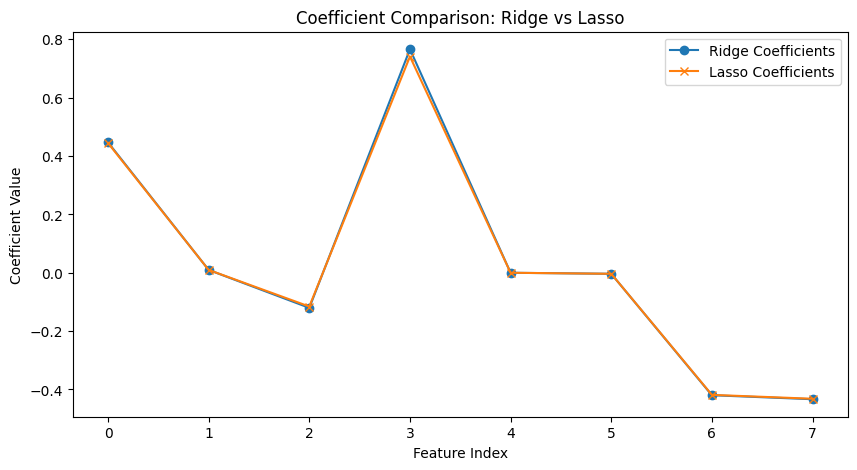

In [26]:
# Train Ridge and Lasso with optimal alpha
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train, y_train)

lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000)
lasso_best.fit(X_train, y_train)

# Compare coefficients
plt.figure(figsize=(10,5))
plt.plot(ridge_best.coef_, marker='o', label='Ridge Coefficients')
plt.plot(lasso_best.coef_, marker='x', label='Lasso Coefficients')
plt.title("Coefficient Comparison: Ridge vs Lasso")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()


**Part-2**

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
# Load Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 455
Test samples: 114


In [29]:
# Baseline Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Coefficients
print("Coefficients:", logreg.coef_)

# Accuracy
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Coefficients: [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Training Accuracy: 0.9582417582417583
Test Accuracy: 0.956140350877193


In [30]:
# Hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'],
              'solver': ['liblinear']}  # liblinear supports l1 and l2

# GridSearchCV
logreg_grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

print("Best parameters:", logreg_grid.best_params_)

# Evaluate on test set
y_test_best = logreg_grid.predict(X_test)
print("Test Accuracy (tuned):", accuracy_score(y_test, y_test_best))


Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy (tuned): 0.9824561403508771


L1 Training Accuracy: 0.989010989010989
L1 Test Accuracy: 0.9824561403508771
L2 Training Accuracy: 0.9692307692307692
L2 Test Accuracy: 0.956140350877193


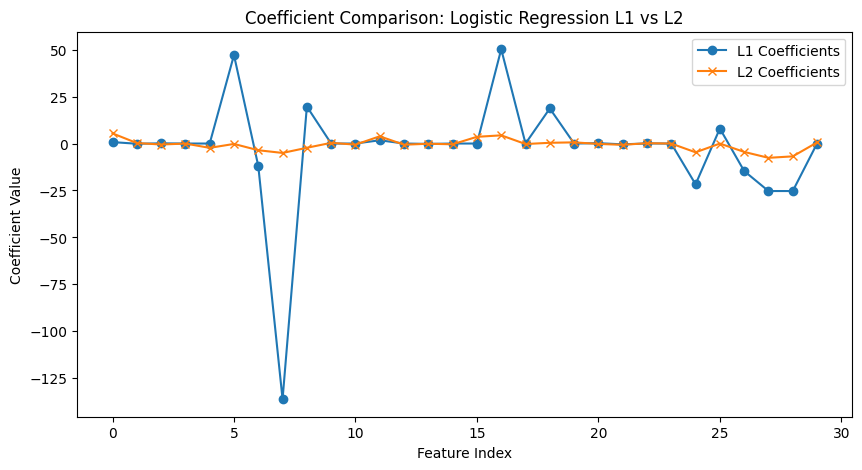

In [31]:
# Train L1 and L2 Logistic Regression with best C
logreg_l1 = LogisticRegression(penalty='l1', C=logreg_grid.best_params_['C'], solver='liblinear', max_iter=10000)
logreg_l1.fit(X_train, y_train)

logreg_l2 = LogisticRegression(penalty='l2', C=logreg_grid.best_params_['C'], solver='liblinear', max_iter=10000)
logreg_l2.fit(X_train, y_train)

# Accuracy comparison
print("L1 Training Accuracy:", accuracy_score(y_train, logreg_l1.predict(X_train)))
print("L1 Test Accuracy:", accuracy_score(y_test, logreg_l1.predict(X_test)))
print("L2 Training Accuracy:", accuracy_score(y_train, logreg_l2.predict(X_train)))
print("L2 Test Accuracy:", accuracy_score(y_test, logreg_l2.predict(X_test)))

# Plot coefficients
plt.figure(figsize=(10,5))
plt.plot(logreg_l1.coef_[0], marker='o', label='L1 Coefficients')
plt.plot(logreg_l2.coef_[0], marker='x', label='L2 Coefficients')
plt.title("Coefficient Comparison: Logistic Regression L1 vs L2")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()
